# Scikitlearn comes with pre-loaded dataset, load the digits dataset from that collection

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
digits = datasets.load_digits()
print(digits.data)
print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


# Write a helper function to plot the image using matplotlib

1797


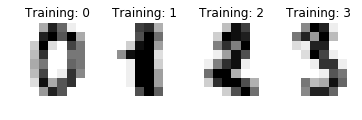

In [2]:
images_targets = list(zip(digits.images,digits.target))
print(len(images_targets))

for index, (image, label) in enumerate(images_targets[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# Make a train -test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
transformedData = digits.images.reshape((n_samples, -1))

#print(len(transformedData))
#print(len(digits.target))

train_x, test_x, train_y, test_y = train_test_split(transformedData, digits.target, test_size=0.20, random_state=5)

lr = LogisticRegression()
lr.fit(train_x,train_y)

pred_y = lr.predict(test_x)

#Accuracy
print("Acuuracy is:: ", metrics.accuracy_score(test_y, pred_y))

C:\Users\ruchika_garg01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ruchika_garg01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Acuuracy is::  0.9611111111111111


# Using scikitlearn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace

In [11]:
from sklearn.decomposition import PCA
import pandas as pd

#pca = PCA(n_components = 10)
pca = PCA(n_components = 3)

pca.fit(transformedData)

#reduced features data
reduced_features_data = pca.transform(transformedData)
reduced_features_df = pd.DataFrame(reduced_features_data)

#reduced_features_df.index = transformedData.index
#reduced_features_df.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
reduced_features_df.columns = ['PC1','PC2','PC3']

print(reduced_features_df.head())

#variance ratio
print(pca.explained_variance_ratio_)

         PC1        PC2       PC3
0  -1.259466  21.274883 -9.463056
1   7.957611 -20.768699  4.439503
2   6.991923  -9.955986  2.958561
3 -15.906105   3.332464  9.824370
4  23.306867   4.269061 -5.675129
[0.14890594 0.13618771 0.11794594]


# Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model andcomment on the accuracy

In [12]:
train_x_pca, test_x_pca, train_y_pca, test_y_pca = train_test_split(reduced_features_df, digits.target, test_size=0.20, random_state=5)

lr1 = LogisticRegression()
lr1.fit(train_x_pca,train_y_pca)

pred_y_pca = lr1.predict(test_x_pca)

#Accuracy
print("Accuracy is:: ", metrics.accuracy_score(test_y_pca, pred_y_pca))

Acuuracy is::  0.6666666666666666


C:\Users\ruchika_garg01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ruchika_garg01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample,plot the digit along with predicted and original label.

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y_pca, pred_y_pca)
print(cm)

[[32  0  0  0  1  0  1  0  0  1]
 [ 0 21  5  0  0  0  0  6  1  2]
 [ 0  1 30  2  0  0  0  1  2  0]
 [ 0  0  5 25  0  4  0  2  0  1]
 [ 0  0  0  0 31  0  0  1  0  0]
 [ 0 10  1  1  1  9  0  1  5 18]
 [ 0  0  0  0  1  0 29  0  0  0]
 [ 0  5  1  0  1  0  0 34  0  1]
 [ 0  8 11  0  0  5  0  0  9  5]
 [ 1  1  0  5  0  0  0  2  0 20]]


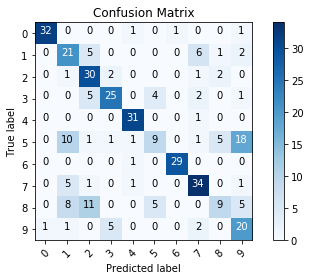

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = digits.target_names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()